In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({'font.size': 24})

In [3]:
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

constants

In [8]:
ferm_mass = {'nue'   :0.0,
            'numu'  :0.0,
            'nutau' :0.0,
            'e'     :0.000511,
            'mu'    :0.105,
            'tau'   :1.777,
            'u'     :0.002,
            'd'     :0.005,
            's'     :0.095,
            'c'     :1.275,
            'b'     :4.180,
            't'     :173.210}

g_vector = {'nue'   :0.5,
            'numu'  :0.5,
            'nutau' :0.5,
            'e'     :-0.038,
            'mu'    :-0.038,
            'tau'   :-0.038,
            'u'     :0.192,
            'd'     :-0.346,
            's'     :-0.346,
            'c'     :0.192,
            'b'     :-0.346,
            't'     :0.192}

g_axial =  {'nue'   :-0.5,
            'numu'  :-0.5,
            'nutau' :-0.5,
            'e'     :0.5,
            'mu'    :0.5,
            'tau'   :0.5,
            'u'     :0.5,
            'd'     :0.5,
            's'     :0.5,
            'c'     :0.5,
            'b'     :0.5,
            't'     :0.5}

functions definitions

In [13]:
def theta(mf, mz):
    
    th = np.ones(len(mz))
    th[(mz<2*mf)] *= 0
    return th
    
def mfi(fkey, mz):
    # there should be a coeff, butwe are computing 
    # ratio, so I'll skip it
    
    mf = ferm_mass[fkey]
    
    V = g_vector[fkey]**2 * (1.+2*(mf/mz)**2)
    A = g_axial[fkey]**2  * (1.-4*(mf/mz)**2)
    
    return V+A
    
def width(fkey, mz):
    # there should be a coeff, butwe are computing 
    # ratio, so I'll skip it
    
    mf = ferm_mass[fkey]

    ampl = mfi(fkey, mz)
    th = theta(mf, mz)
    
    main_body = ampl * np.sqrt(1. - 4*(mf/mz)**2)
    main_body[np.isnan(main_body)] = np.zeros(len(main_body[np.isnan(main_body)]))
    
    return main_body * th
    
def width_all(mz):
    Gammas_all = np.array([width(fi, mz)for fi in ferm_mass.keys()])
    return np.sum(Gammas_all, axis=0)

plotting function

In [27]:
def plot_br(mz_min=0.001, mz_max=5., fermion_keys=ferm_mass.keys()):
    
    higgs_mass = np.linspace(mz_min,mz_max,300)
    Gamma_tot = width_all(higgs_mass)
    
    plt.figure(figsize=(12,6))
    plt.xlabel(r'$m_Z$, GeV')
    plt.ylabel(r'$B_i$')
    plt.ylim(0.,0.25)
    plt.xlim(mz_min, mz_max)
    
    plt.axhline(1., c='k', lw=2, linestyle='--')

    for k in fermion_keys:
        plt.plot(higgs_mass, width(k, higgs_mass)/Gamma_tot, 
                 lw=3, label=k)
    
    plt.legend(fontsize=15, ncol=5)
    plt.grid(alpha=0.2)
    plt.show()
    
    return 0

# 1. Z0 mass from 0 to 5 GeV

/home/maria/.local/lib/python2.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in sqrt


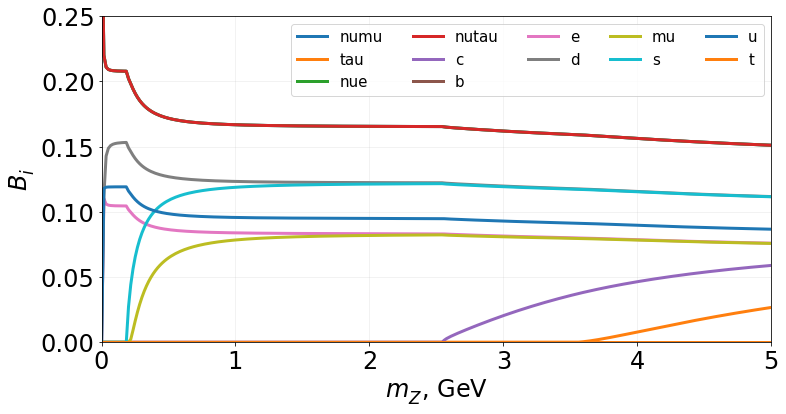

0

In [30]:
plot_br(mz_min=0.001, mz_max=5.)

# 2. Z0 mass from 0 to 500 GeV

/home/maria/.local/lib/python2.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in sqrt


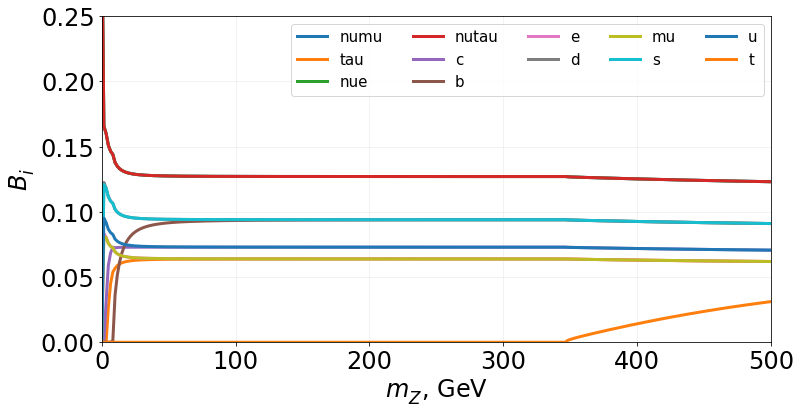

0

In [31]:
plot_br(mz_min=0.001, mz_max=500.)